<h1>Supervised learning since we have data to test on?

In [1]:
import pandas as pd
import numpy as np

In [2]:
apple = pd.read_csv('apple.csv')
apple = apple[apple.columns[1:]]

In [3]:
apple.info()
#need to convert size to float
#add "type" dummy to match with google dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 9 columns):
app                 7189 non-null object
size                7189 non-null object
price               7189 non-null float64
rating_count        7189 non-null int64
rating_count_ver    7189 non-null int64
rating              7189 non-null float64
rating_ver          7189 non-null float64
content             7189 non-null object
category            7189 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 505.6+ KB


In [4]:
apple['size'] = apple['size'].apply(lambda x: x.replace(',','') if ',' in str(x) else x).apply(float)

In [5]:
apple['type'] = np.where(apple['price']==0.00,0,1)
#Free: 0
#Paid: 1

In [6]:
apple = apple[['app','size','price','type','category','content','rating','rating_count','rating_ver','rating_count_ver']]

In [7]:
apple.head()
#DV: rating - by version? visualization?
#IV: size, price (binary set), category, content, rating count(correlation?)
#current version rating

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
0,PAC-MAN Premium,100.788,3.99,1,Games,4+,4.0,21292,4.5,26
1,Evernote - stay organized,158.579,0.00,0,Productivity,4+,4.0,161065,3.5,26
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,0,Weather,4+,3.5,188583,4.5,2822
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,0,Shopping,12+,4.0,262241,4.5,649
4,Bible,92.774,0.00,0,Books & Reference,4+,4.5,985920,5.0,5320


In [8]:
apple[apple['rating_count_ver']<0.5]

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
23,Mileage Log | Fahrtenbuch,71.204,5.99,1,Business,4+,4.5,8,0.0,0
32,Election 2016 Map,2.387,0.99,1,Entertainment,4+,3.0,137,0.0,0
38,Hurricane Pro,29.519,2.99,1,Weather,17+,4.5,2104,0.0,0
42,iStellar,44.242,3.99,1,Navigation,4+,3.5,30,0.0,0
44,Avertinoo,8.045,4.99,1,Navigation,4+,3.0,32,0.0,0
68,大辞林,210.089,21.99,1,Books & Reference,4+,4.5,64,0.0,0
84,同花顺-炒股、股票,122.886,0.00,0,Finance,4+,3.5,1744,0.0,0
106,iSwap Faces LITE,30.797,0.00,0,Photo & Video,4+,3.0,39722,0.0,0
111,niconico,25.809,0.00,0,Entertainment,17+,3.0,182,0.0,0
117,20 Minutes.fr - l'actualité en continu,109.616,0.00,0,News,12+,3.5,112,0.0,0


In [9]:
#1438 rows without rating -> useless
apple = apple[apple['rating_count_ver']>0]
apple.info()
#7189 entries to 5751 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5751 entries, 0 to 7188
Data columns (total 10 columns):
app                 5751 non-null object
size                5751 non-null float64
price               5751 non-null float64
type                5751 non-null int64
category            5751 non-null object
content             5751 non-null object
rating              5751 non-null float64
rating_count        5751 non-null int64
rating_ver          5751 non-null float64
rating_count_ver    5751 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 494.2+ KB


In [10]:
google = pd.read_csv('google.csv')
google = google[google.columns[1:]]

In [11]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 9 columns):
app             8196 non-null object
rating          8196 non-null float64
rating_count    8196 non-null int64
size            7027 non-null float64
installs        8196 non-null int64
type            8196 non-null object
price           8196 non-null float64
content         8196 non-null object
category        8196 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 576.4+ KB


In [12]:
#some sizes are NaN
print(google['size'].size)
google['size'].count()
#about 1000 of them

8196


7027

In [13]:
google.groupby('type').size()

type
Free    7592
Paid     604
dtype: int64

In [14]:
#convert type to dummy: Free=0, Paid=1
google['type']=np.where(google['type']=='Free',0,1)

In [15]:
google = google[['app','size','price','type','category','content','rating','rating_count','installs']]

In [16]:
google.head()
#DV could be rating & installs
#IV: size, price (binary as well), category, content, type
#adjust for rating_count?

,app,size,price,type,category,content,rating,rating_count,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,0,Lifestyle,4+,4.1,159,10000
1,Coloring book moana,14.0,0.0,0,Lifestyle,4+,3.9,967,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,0,Lifestyle,4+,4.7,87510,5000000
3,Sketch - Draw & Paint,25.0,0.0,0,Lifestyle,12+,4.5,215644,50000000
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,0,Lifestyle,4+,4.3,967,100000


In [17]:
googlereviews = pd.read_csv('googlereviews.csv')
googlereviews = googlereviews[googlereviews.columns[1:]]
googlereviews.head()

,app,review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,This help eating healthy exercise regular basis
2,10 Best Foods for You,Works great especially going grocery store
3,10 Best Foods for You,Best idea us
4,10 Best Foods for You,Best way


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

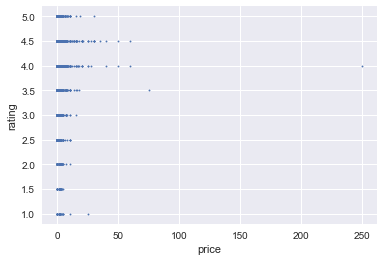

In [19]:
plt.scatter(apple['price'], apple['rating'], s=2)
plt.xlabel('price')
plt.ylabel('rating')

plt.show()

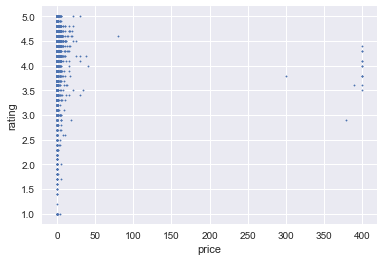

In [20]:
plt.scatter(google['price'], google['rating'], s=2)
plt.xlabel('price')
plt.ylabel('rating')

plt.show()

In [21]:
apple[apple.price > 50]

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
115,Proloquo2Go - Symbol-based AAC,723.764,249.99,1,Education,4+,4.0,773,3.5,10
162,NAVIGON Europe,144.413,74.99,1,Navigation,4+,3.5,927,2.5,3
1136,Articulation Station Pro,425.919,59.99,1,Education,4+,4.5,294,5.0,130
3237,FineScanner Pro - PDF Document Scanner App + OCR,63.974,59.99,1,Business,4+,4.0,100,4.5,4


In [22]:
google[google.price>50]
#based on the app names, most the extremely apps could be counted as 'useless' outliers

,app,size,price,type,category,content,rating,rating_count,installs
1675,Vargo Anesthesia Mega App,32.000,79.99,1,Medical,4+,4.6,92,1000
3177,most expensive app (H),1.500,399.99,1,Entertainment,4+,4.3,6,100
3303,💎 I'm rich,26.000,399.99,1,Lifestyle,4+,3.8,718,10000
3307,I'm Rich - Trump Edition,7.300,400.00,1,Lifestyle,4+,3.6,275,10000
4101,I am rich,1.800,399.99,1,Lifestyle,4+,3.8,3547,100000
4103,I am Rich Plus,8.700,399.99,1,Entertainment,4+,4.0,856,10000
4104,I am rich VIP,2.600,299.99,1,Lifestyle,4+,3.8,411,10000
4105,I Am Rich Premium,4.700,399.99,1,Finance,4+,4.1,1867,50000
4106,I am extremely Rich,2.900,379.99,1,Lifestyle,4+,2.9,41,1000
4107,I am Rich!,22.000,399.99,1,Finance,4+,3.8,93,1000


In [23]:
#take out price outliers
apple = apple[apple['price']<=50]
google = google[google['price']<=50]

In [24]:
print(apple.info())
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 7188
Data columns (total 10 columns):
app                 5747 non-null object
size                5747 non-null float64
price               5747 non-null float64
type                5747 non-null int64
category            5747 non-null object
content             5747 non-null object
rating              5747 non-null float64
rating_count        5747 non-null int64
rating_ver          5747 non-null float64
rating_count_ver    5747 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 493.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8180 entries, 0 to 8195
Data columns (total 9 columns):
app             8180 non-null object
size            7011 non-null float64
price           8180 non-null float64
type            8180 non-null int64
category        8180 non-null object
content         8180 non-null object
rating          8180 non-null float64
rating_count    8180 non-null int64
installs  

<h1>Regression</h1>
<li>predict rating: apple & google</li>
<li>by category</li>

In [25]:
from sklearn import linear_model 

In [28]:
from sklearn.model_selection import train_test_split

In [26]:
#Divide dataset into different categories

In [31]:
#apple

train, test = train_test_split(apple, test_size = 0.3) #30% as test set
# x_train = train.iloc[0:,0:60]
# y_train = train[60] #single out the output feature
# x_test = test.iloc[0:,0:60]
# y_test = test[60]
# y_train #trained result by index

<h1>Overall Forest</h1>
should we do horizontal grouping? we don't have many features - <b>ensemble learning random forest</b>

In [32]:
# !pip install sklearn --upgrade

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [34]:
model = tree.DecisionTreeRegressor(random_state=1)
#model = DecisionTreeRegressor(max_depth = 3)

In [35]:
# !pip install pydotplus --upgrade

In [36]:
#tree visualization
from IPython.display import Image
import pydotplus

<h4>create dummies</h4>

In [37]:
print(list(apple['category'].unique()))
type(apple['category'].unique()[0])

['Games', 'Productivity', 'Weather', 'Shopping', 'Books & Reference', 'Finance', 'Entertainment', 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Health & Fitness', 'Photo & Video', 'Business', 'Education', 'Lifestyle', 'Food & Drink', 'News', 'Navigation', 'Medical']


str

In [38]:
for i in apple['category'].unique():
    name = 'dummy_'+i
    apple[name] = np.where(apple['category']==i,1,0)

In [39]:
print(apple['content'].unique())
type(apple['content'].unique()[0])

['4+' '12+' '17+' '9+']


str

In [40]:
for i in apple['content'].unique():
    name = 'dummy_content_'+i
    apple[name] = np.where(apple['category']==i,1,0)

In [41]:
print(google['category'].unique())
type(google['category'].unique()[0])

['Lifestyle' 'Games' 'Photo & Video' 'Books & Reference' 'Business'
 'Social Networking' 'Education' 'Entertainment' 'Productivity' 'Finance'
 'Food & Drink' 'Health & Fitness' 'Medical' 'Shopping' 'Sports' 'Travel'
 'Utilities' 'Weather' 'News' 'Navigation']


str

In [42]:
for i in google['category'].unique():
    name = 'dummy_'+i
    google[name] = np.where(google['category']==i,1,0)

In [43]:
print(google['content'].unique())
type(google['content'].unique()[0])

['4+' '12+' '9+' '17+']


str

In [44]:
for i in google['content'].unique():
    name = 'dummy_content_'+i
    google[name] = np.where(google['content']==i,1,0)

<h4><i>Maybe, </i>Popularity is also related to apps' name length</h4>

In [45]:
apple['app_name_len']=apple['app'].apply(lambda x: len(x))
apple.head()

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver,...,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_12+,dummy_content_17+,dummy_content_9+,app_name_len
0,PAC-MAN Premium,100.788,3.99,1,Games,4+,4.0,21292,4.5,26,...,0,0,0,0,0,0,0,0,0,15
1,Evernote - stay organized,158.579,0.00,0,Productivity,4+,4.0,161065,3.5,26,...,0,0,0,0,0,0,0,0,0,25
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,0,Weather,4+,3.5,188583,4.5,2822,...,0,0,0,0,0,0,0,0,0,47
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,0,Shopping,12+,4.0,262241,4.5,649,...,0,0,0,0,0,0,0,0,0,50
4,Bible,92.774,0.00,0,Books & Reference,4+,4.5,985920,5.0,5320,...,0,0,0,0,0,0,0,0,0,5


In [46]:
google['app_name_len']=google['app'].apply(lambda x: len(x))
google.head()

,app,size,price,type,category,content,rating,rating_count,installs,dummy_Lifestyle,...,dummy_Travel,dummy_Utilities,dummy_Weather,dummy_News,dummy_Navigation,dummy_content_4+,dummy_content_12+,dummy_content_9+,dummy_content_17+,app_name_len
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,0,Lifestyle,4+,4.1,159,10000,1,...,0,0,0,0,0,1,0,0,0,46
1,Coloring book moana,14.0,0.0,0,Lifestyle,4+,3.9,967,500000,1,...,0,0,0,0,0,1,0,0,0,19
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,0,Lifestyle,4+,4.7,87510,5000000,1,...,0,0,0,0,0,1,0,0,0,50
3,Sketch - Draw & Paint,25.0,0.0,0,Lifestyle,12+,4.5,215644,50000000,1,...,0,0,0,0,0,0,1,0,0,21
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,0,Lifestyle,4+,4.3,967,100000,1,...,0,0,0,0,0,1,0,0,0,37


<h2>Apple</h2>

In [47]:
apple_index_dict = dict()
apple_keys = range(len(apple.columns))
apple_values = list(apple.columns)
for i in apple_keys:
    apple_index_dict[i]=apple_values[i]

apple_index_dict

{0: 'app',
 1: 'size',
 2: 'price',
 3: 'type',
 4: 'category',
 5: 'content',
 6: 'rating',
 7: 'rating_count',
 8: 'rating_ver',
 9: 'rating_count_ver',
 10: 'dummy_Games',
 11: 'dummy_Productivity',
 12: 'dummy_Weather',
 13: 'dummy_Shopping',
 14: 'dummy_Books & Reference',
 15: 'dummy_Finance',
 16: 'dummy_Entertainment',
 17: 'dummy_Utilities',
 18: 'dummy_Travel',
 19: 'dummy_Social Networking',
 20: 'dummy_Sports',
 21: 'dummy_Health & Fitness',
 22: 'dummy_Photo & Video',
 23: 'dummy_Business',
 24: 'dummy_Education',
 25: 'dummy_Lifestyle',
 26: 'dummy_Food & Drink',
 27: 'dummy_News',
 28: 'dummy_Navigation',
 29: 'dummy_Medical',
 30: 'dummy_content_4+',
 31: 'dummy_content_12+',
 32: 'dummy_content_17+',
 33: 'dummy_content_9+',
 34: 'app_name_len'}

In [48]:
#Rating as DV
#IV: size, price, rating count(??), category, content, length of name(??)
#should not have price and type together as they directly correlate with one another

train_a, test_a = train_test_split(apple, test_size = 0.3)


In [55]:
x_train_a = train_a.iloc[0:,[1,2,7,
                              10,11,12,13,14,15,16,17,18,19,
                              20,21,22,23,24,25,26,27,28,29,
                              30,31,32,33,34]]
y_train_a = train_a[['rating']]
x_test_a = test_a.iloc[0:,[1,2,7,
                              10,11,12,13,14,15,16,17,18,19,
                              20,21,22,23,24,25,26,27,28,29,
                              30,31,32,33,34]]
y_test_a = test_a[['rating']]

In [56]:
x_train_a.head()

,size,price,rating_count,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,dummy_Finance,dummy_Entertainment,...,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Navigation,dummy_Medical,dummy_content_4+,dummy_content_12+,dummy_content_17+,dummy_content_9+,app_name_len
6061,60.990,0.99,78,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
3935,385.683,0.00,8394,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
873,161.202,0.00,51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2467,104.360,1.99,262,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
5838,207.392,0.00,29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


In [57]:
model.fit(x_train_a,y_train_a)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [58]:
feature_names = ['size','price','rating count',
                 'Games', 'Productivity', 'Weather', 'Shopping', 'Books & Reference', 'Finance', 
                 'Entertainment', 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business', 
                 'Health & Fitness', 'Photo & Video', 'Navigation', 'Education', 'Lifestyle', 
                 'Food & Drink', 'News', 'Medical',
                 '4+','12+','17+','9+',
                 'name length']
# from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
# import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

#Need to figure out how to convert back the dummies
#Manually draw the tree elsewhere?

InvocationException: GraphViz's executables not found

<h2>Google</h2>

In [59]:
google_index_dict = dict()
google_keys = range(len(google.columns))
google_values = list(google.columns)
for i in google_keys:
    google_index_dict[i]=google_values[i]

google_index_dict

{0: 'app',
 1: 'size',
 2: 'price',
 3: 'type',
 4: 'category',
 5: 'content',
 6: 'rating',
 7: 'rating_count',
 8: 'installs',
 9: 'dummy_Lifestyle',
 10: 'dummy_Games',
 11: 'dummy_Photo & Video',
 12: 'dummy_Books & Reference',
 13: 'dummy_Business',
 14: 'dummy_Social Networking',
 15: 'dummy_Education',
 16: 'dummy_Entertainment',
 17: 'dummy_Productivity',
 18: 'dummy_Finance',
 19: 'dummy_Food & Drink',
 20: 'dummy_Health & Fitness',
 21: 'dummy_Medical',
 22: 'dummy_Shopping',
 23: 'dummy_Sports',
 24: 'dummy_Travel',
 25: 'dummy_Utilities',
 26: 'dummy_Weather',
 27: 'dummy_News',
 28: 'dummy_Navigation',
 29: 'dummy_content_4+',
 30: 'dummy_content_12+',
 31: 'dummy_content_9+',
 32: 'dummy_content_17+',
 33: 'app_name_len'}

In [60]:
google.head()

,app,size,price,type,category,content,rating,rating_count,installs,dummy_Lifestyle,...,dummy_Travel,dummy_Utilities,dummy_Weather,dummy_News,dummy_Navigation,dummy_content_4+,dummy_content_12+,dummy_content_9+,dummy_content_17+,app_name_len
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,0,Lifestyle,4+,4.1,159,10000,1,...,0,0,0,0,0,1,0,0,0,46
1,Coloring book moana,14.0,0.0,0,Lifestyle,4+,3.9,967,500000,1,...,0,0,0,0,0,1,0,0,0,19
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,0,Lifestyle,4+,4.7,87510,5000000,1,...,0,0,0,0,0,1,0,0,0,50
3,Sketch - Draw & Paint,25.0,0.0,0,Lifestyle,12+,4.5,215644,50000000,1,...,0,0,0,0,0,0,1,0,0,21
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,0,Lifestyle,4+,4.3,967,100000,1,...,0,0,0,0,0,1,0,0,0,37


In [61]:
#Rating & Installs as DV's
#IV: size, price/type, category, content
#should not have price and type together as they directly correlate with one another

train_g, test_g = train_test_split(google, test_size = 0.3)

<h3>Price --> Rating</h3>

In [62]:
"""Price & Rating"""
#size, price, category, rating

x_train_g1 = train_g.iloc[0:,[1,2,9,10]]
y_train_g1 = train_g[['rating']]
x_test_g1 = test_g.iloc[0:,[1,2,9,10]]
y_test_g1 = test_g[['rating']]

In [63]:
x_train_g1.head()

,size,price,dummy_Lifestyle,dummy_Games
1925,NaN,0.0,0,0
1247,13.0,0.0,1,0
758,24.0,0.0,0,0
7781,20.0,0.0,0,0
8140,72.0,0.0,0,0


<h3>Price Type --> Rating

In [64]:
"""Type & Rating"""
x_train_g2 = train_g.iloc[0:,[1,9,10,11]]
y_train_g2 = train_g[['rating']]
x_test_g2 = test_g.iloc[0:,[1,9,10,11]]
y_test_g2 = test_g[['rating']]

In [65]:
x_train_g2.head()

,size,dummy_Lifestyle,dummy_Games,dummy_Photo & Video
1925,NaN,0,0,0
1247,13.0,1,0,0
758,24.0,0,0,0
7781,20.0,0,0,0
8140,72.0,0,0,0
